# Austin Animal Shelter

Analysis of dogs at AAS. What types of breeds are coming into the shelter and how long do they stay. What breeds are getting adopted and where animals are found around the city of Austin. The data will be coming from a Kaggle dataset found here:

https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import sep_breeds
from functions import clean
import seaborn as sns

## Data Wrangling

In [2]:
ifile1 = '../Resources/aac_intakes_outcomes.csv'
ifile2 = '../Resources/aac_outcomes.csv'
ifile3 = '../Resources/aac_intakes.csv'

io_df = pd.read_csv(ifile1)
o_df = pd.read_csv(ifile2)
i_df = pd.read_csv(ifile3)

## Selecting top 20 dog breeds

In [3]:
columns = [
    'breed',
    'animal_id',
    'found_location'
]

dogs = i_df.loc[i_df['animal_type'] == 'Dog', columns]

In [4]:
dogs['breed'] = dogs['breed'].apply(sep_breeds)

In [5]:
breeds_20 = dogs['breed'].value_counts()
top20 = breeds_20.index[:20]

dogs_20 = pd.DataFrame({
    'breed':[],
    'animal_id':[]
})
for i in top20:
    df3 = dogs.loc[dogs['breed'] == i]
    #print(df3.head())
    dogs_20 = dogs_20.append(df3)

/Users/junghyunson/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
io_df = io_df.rename(columns ={
    'animal_id_outcome':'animal_id'
})

iio_df = dogs_20.merge(io_df, on='animal_id',how='inner')

iio_df['new_outcome_type'] = iio_df['outcome_type'].apply(clean)

In [7]:
age_bins = [0, 1.5, 6, 25]
group_names = ["Puppy (<1.5)", "Adult (1.5 - 6)", "Senior (>6)"]
iio_df['age_group'] = pd.cut(iio_df['age_upon_outcome_(years)'],
                          age_bins,labels = group_names)

breed_group = iio_df.groupby('breed_x')
age_group = iio_df.groupby('age_group')
outcome_age_group = iio_df.groupby(['outcome_type','age_group'])
outcome_breed_group = iio_df.groupby(['new_outcome_type','breed_x'])
outcome_group = iio_df.groupby('new_outcome_type')

In [8]:
mean_breed_time = breed_group.agg({
    'time_in_shelter_days':['mean']
})
mean_breed_time.columns = mean_breed_time.columns.droplevel()
mean_breed_time1 = mean_breed_time.sort_values('mean')

mean_age_time = age_group.agg({
    'time_in_shelter_days':['mean']
})

age_outcome = outcome_age_group.agg({
    'age_group':['count']
})

breed_outcome = outcome_breed_group.agg({
    'breed_x':['count']
})

## Time in Shelter (days)

In [9]:
intakes_outcomes = pd.read_csv("../Resources/aac_intakes_outcomes.csv")

In [10]:
# intakes_outcomes data cleanup
intakes_outcomes_cleaned = intakes_outcomes.drop(['sex_upon_outcome', 'intake_weekday','intake_hour','intake_number','time_in_shelter','intake_monthyear','intake_datetime'], axis=1)
intakes_outcomes_cleaned.drop_duplicates(subset='animal_id_outcome', keep='first', inplace=True)
intakes_outcomes_cleaned= intakes_outcomes_cleaned.loc[intakes_outcomes_cleaned["animal_type"]=="Dog"]
intakes_outcomes_cleaned.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,...,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,...,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",12,2017,0.588194
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,...,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",4,2014,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,...,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",11,2013,0.119444
5,15 years,A141142,1998-06-01 00:00:00,NaN,Return to Owner,5475,15.0,"(12.5, 15.0]",2013-11-17 11:40:00,11,...,Aged,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",11,2013,0.870833
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,11,...,Normal,Stray,Intact Female,1,5475,15.0,"(12.5, 15.0]",11,2014,0.178472


In [11]:
# intakes_outcomes data cleanup
intakes_outcomes_cleaned = intakes_outcomes.drop(['sex_upon_outcome', 'intake_weekday','intake_hour','intake_number','time_in_shelter','intake_monthyear','intake_datetime'], axis=1)
intakes_outcomes_cleaned.drop_duplicates(subset='animal_id_outcome', keep='first', inplace=True)
intakes_outcomes_cleaned= intakes_outcomes_cleaned.loc[intakes_outcomes_cleaned["animal_type"]=="Dog"]
intakes_outcomes_cleaned.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,...,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,...,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",12,2017,0.588194
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,...,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",4,2014,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,...,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",11,2013,0.119444
5,15 years,A141142,1998-06-01 00:00:00,NaN,Return to Owner,5475,15.0,"(12.5, 15.0]",2013-11-17 11:40:00,11,...,Aged,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",11,2013,0.870833
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,11,...,Normal,Stray,Intact Female,1,5475,15.0,"(12.5, 15.0]",11,2014,0.178472


# Gmap - Intake Locations

In [12]:
import requests
import gmaps

from config import gkey
# conda install -c conda-forge rise
# pip install RISE
# jupyter-nbextension install rise --py --sys-prefix
# Configure gmaps
gmaps.configure(api_key=gkey)

## Cleaning location data

In [13]:
intakes = pd.read_csv("../Resources/aac_intakes.csv")

# intakes data wrangling
intakes_cleaned = intakes.drop(['color', 'datetime', 'datetime2', 'name', 'sex_upon_intake'], axis=1)
intakes_cleaned.drop_duplicates(subset='animal_id', keep='first', inplace=True)
intakes_cleaned.dropna
new = intakes_cleaned['breed'].str.split('/',n=1, expand = True)

intakes_cleaned["breed_new"] = new[0]
intakes_cleaned["sub_breed_new"] = new[1]

for index, row in intakes_cleaned.iterrows():
    if row["sub_breed_new"] is not None:
        row["breed_new"] = row["breed_new"] +' Mix'

intakes_cleaned_dogs= intakes_cleaned.loc[intakes_cleaned["animal_type"]=="Dog"]
intakes_cleaned_dogs = intakes_cleaned_dogs.groupby('breed_new').filter(lambda group: len(group) > 430)
intakes_cleaned_dogs.head()

,age_upon_intake,animal_id,animal_type,breed,found_location,intake_condition,intake_type,breed_new,sub_breed_new
4,2 years,A743852,Dog,Labrador Retriever Mix,Austin (TX),Normal,Owner Surrender,Labrador Retriever Mix,None
5,2 years,A708452,Dog,Labrador Retriever Mix,Austin (TX),Normal,Public Assist,Labrador Retriever Mix,None
14,2 months,A697950,Dog,Australian Cattle Dog/Labrador Retriever,1501 S Fm 973 in Austin (TX),Normal,Stray,Australian Cattle Dog Mix,Labrador Retriever
18,4 months,A749436,Dog,Dachshund Mix,East Pleasant Valley And Stassney in Austin (TX),Normal,Stray,Dachshund Mix,None
21,1 month,A759935,Dog,Labrador Retriever Mix,4800 Cottonwood St in Austin (TX),Normal,Stray,Labrador Retriever Mix,None


In [14]:

intakes_location = intakes_cleaned_dogs[intakes_cleaned_dogs["found_location"].str.len()>30]
addresses  = intakes_location["found_location"]
addresses.head()

18    East Pleasant Valley And Stassney in Austin (TX)
21                   4800 Cottonwood St in Austin (TX)
22                  Guadalupe/St. Johns in Austin (TX)
28                 4200 Smith School Rd in Austin (TX)
33            11699 James B Connolly Ln in Austin (TX)
Name: found_location, dtype: object

## Geocode for lcoations

In [ ]:
def get_google_results(address, api_key=None, return_full_response=False):
    
    
    geocode_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}".format(address)
    geocode_url = geocode_url + "&key={}".format(api_key)
        
    results = requests.get(geocode_url)
    results = results.json()
    
    if len(results['results']) == 0:
        output = {
            "formatted_address" : None,
            "latitude": None,
            "longitude": None,
            "postcode": None
                }
    else:    
        answer = results['results'][0]
        output = {
            "formatted_address" : answer.get('formatted_address'),
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng'),
            "postcode": ",".join([x['long_name'] for x in answer.get('address_components') 
                                  if 'postal_code' in x.get('types')])
                }
        
    output['input_string'] = address
    output['number_of_results'] = len(results['results'])
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output


In [ ]:
import logging
import time

BACKOFF_TIME = 3000
RETURN_FULL_RESULTS = False
logger = logging.getLogger("root")
output_filename = ''
logger.setLevel(logging.DEBUG)
# create console handler
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
logger.addHandler(ch)

counter = 0
results = []

for address in addresses:

    geocoded = False
    while geocoded is not True:
        

        try:
            geocode_result = get_google_results(address, gkey, return_full_response=RETURN_FULL_RESULTS)
        except Exception as e:
            logger.exception(e)
            logger.error("Skipping!")
            geocoded = True
            
#         if geocode_result['status'] != 'OK':
#             logger.warning("Error geocoding {}: {}".format(address, geocode_result['status']))
        logger.debug("Geocoded: {}: {}".format(address, geocode_result['status']))
        results.append(geocode_result)           
        geocoded = True
        counter = counter + 1 
        
    if len(results) == 1000:
        pd.DataFrame(results).to_csv("gmap_results.csv")
        break
logger.info("Finished geocoding all addresses")


In [15]:
results_df = pd.read_csv("../Resources/gmap_results.csv")
results_df = pd.DataFrame(results_df)
# results_df

indexNames = results_df[ results_df['postcode'] == "" ].index
results_df.drop(indexNames , inplace=True)
# results_df.head()
locations = results_df[["latitude", "longitude","postcode"]]
# locations.head()
locations_grouped = locations.groupby("postcode").latitude.count()
locations_grouped = locations_grouped.reset_index()
# locations_grouped.head()

locations_grouped = locations_grouped.rename(columns={'latitude':'total_count'})
locations_grouped = locations_grouped.sort_values(by = ["total_count"], ascending = False)

# locations_grouped = locations_grouped.drop([0], axis=0)
# locations_grouped.head()
locations_merged = pd.merge(locations, locations_grouped, left_on='postcode', right_on='postcode', how ='inner')
locations_merged.head()


,latitude,longitude,postcode,total_count
0,30.194003,-97.744737,78744,79
1,30.196593,-97.733247,78744,79
2,30.192835,-97.715279,78744,79
3,30.205669,-97.690594,78744,79
4,30.198444,-97.697174,78744,79


In [16]:
locations_coordinates = locations_merged[["latitude","longitude"]]
# locations_coordinates.head()
locations_weight = locations_merged["total_count"]
locations_weight.head()

0    79
1    79
2    79
3    79
4    79
Name: total_count, dtype: int64

In [ ]:
# plt.figure(figsize=(12,12))
# sns.boxplot( x='outcome_type', y='age_upon_outcome_(years)', data= intakes_outcomes_cleaned)
# plt.title("Age by Outcome of Dogs")
# plt.xlabel("Outcomes")
# plt.ylabel("Age")
# plt.savefig("Age_by_Outcomes.png")
# plt.show()

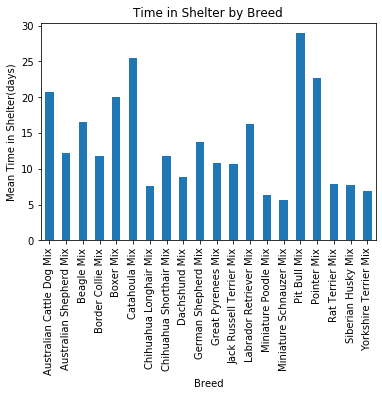

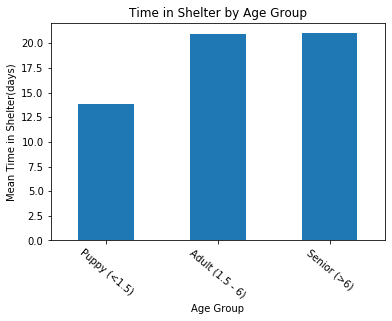

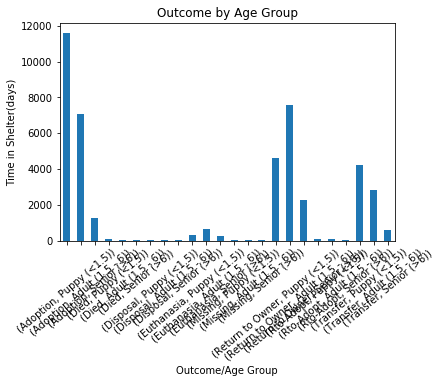

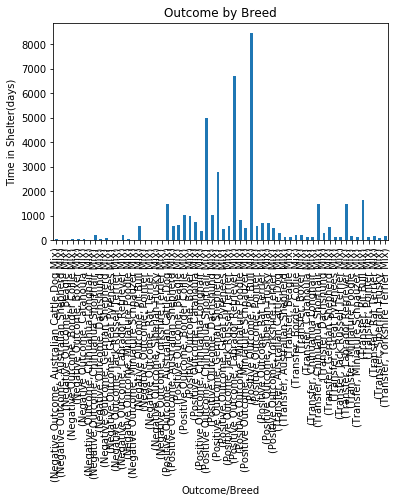

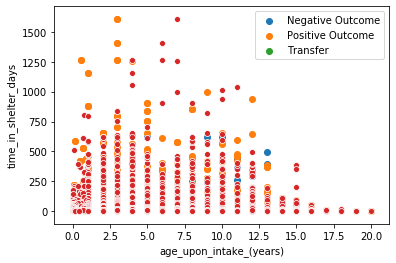

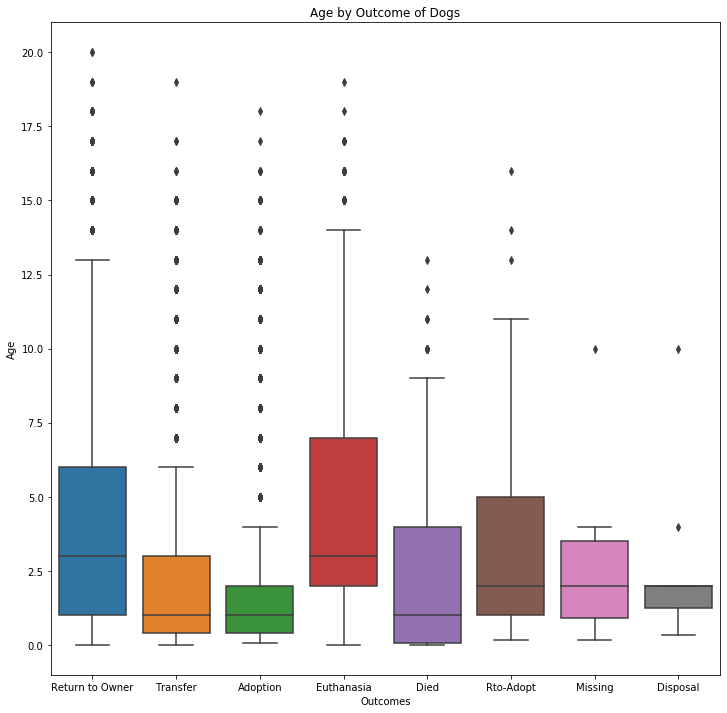

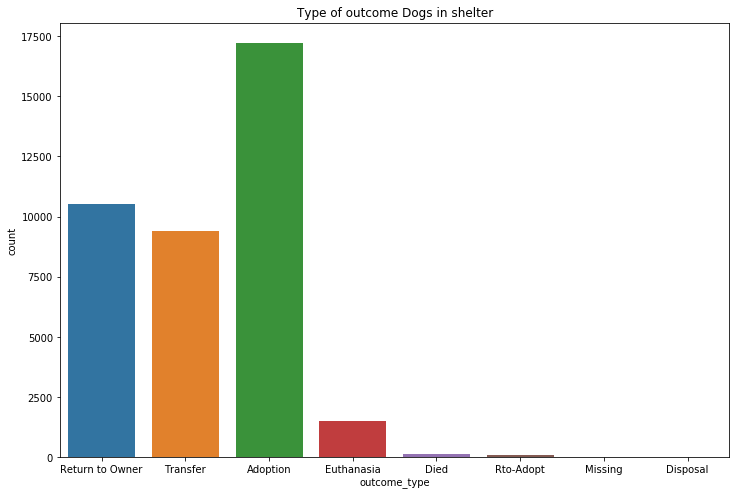

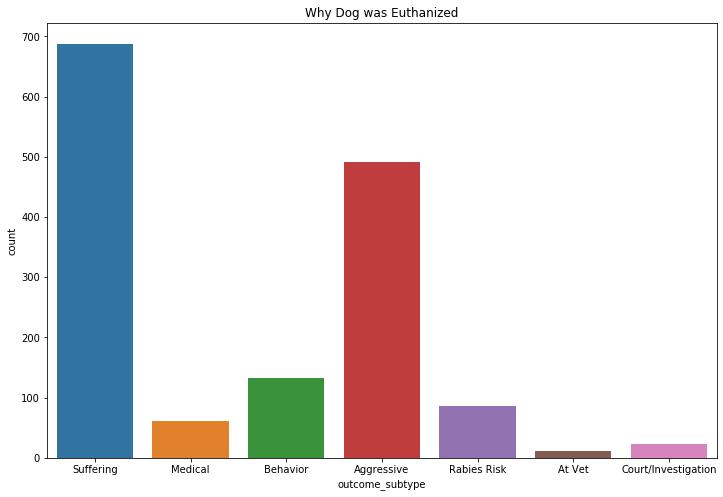

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [17]:
mean_breed_time.plot.bar(legend=False, title='Time in Shelter by Breed',label = 'Time in Shelter(days)',rot=90)
plt.xlabel('Breed')
plt.ylabel('Mean Time in Shelter(days)')
plt.savefig('Mean Time in Shelter(days).png')

mean_age_time.plot.bar(legend=False, title='Time in Shelter by Age Group',label = 'Time in Shelter(days)',rot=-40)
plt.xlabel('Age Group')
plt.ylabel('Mean Time in Shelter(days)')
plt.savefig('Mean Time in Shelter(days).png')

age_outcome.plot.bar(legend=False, title='Outcome by Age Group',label = 'Time in Shelter(days)',rot=40)
plt.xlabel('Outcome/Age Group')
plt.ylabel('Time in Shelter(days)')
plt.savefig('Time in Shelter(days).png')


breed_outcome.plot.bar(legend=False, title='Outcome by Breed',label = 'Time in Shelter(days)')
plt.xlabel('Outcome/Breed')
plt.ylabel('Time in Shelter(days)')
plt.savefig('Time in Shelter(days).png')

fig, ax = plt.subplots(1)

for name,group in outcome_group:
    ax.scatter(group['age_upon_outcome_(years)'],group['time_in_shelter_days'],label=name)
ax.legend()

fig.savefig('20scatter.png')

# Time in Shelter (Days)
sns.scatterplot(x='age_upon_intake_(years)', y='time_in_shelter_days' , data=intakes_outcomes_cleaned)

# Age upon Outcome (Years)
plt.figure(figsize=(12,12))
sns.boxplot( x='outcome_type', y='age_upon_outcome_(years)', data= intakes_outcomes_cleaned)
plt.title("Age by Outcome of Dogs")
plt.xlabel("Outcomes")
plt.ylabel("Age")
plt.savefig("Age_by_Outcomes.png")
plt.show()

# Type of Outcome (Dogs)
plt.figure(figsize=(12,8))
sns.countplot(x='outcome_type',data=intakes_outcomes_cleaned)
plt.title('Type of outcome Dogs in shelter')
plt.savefig("outcome_type.png")
plt.show()

# Euthanisia Types
euth=intakes_outcomes_cleaned[intakes_outcomes_cleaned["outcome_type"]=="Euthanasia"]
plt.figure(figsize=(12,8))
sns.countplot(x='outcome_subtype',data=euth)
plt.title('Why Dog was Euthanized')
plt.savefig("Euthanasia_data.png")
plt.show()

# Gmap Intake Locations

figure_layout = {
    'width': '1000px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto',
    'center':'30.2672, 97.7431',
    'zoom_level' :21
}

fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_coordinates, weights=locations_weight, 
                                 dissipating=False, max_intensity=1,
                                 point_radius=0.0025
                                )

fig.add_layer(heat_layer)

plt.savefig("Dogs found locations.png")
fig